# 서울지역 스타벅스 매장정보 크롤링 
- 과제1 : 메인화면 페이지 화면캡쳐 및 저장
- 과제2 : 서울지역 스타벅스 매장정보 크롤링
- 과제3 : 서울인구 정보를 가져온 후 스타벅스지표를 나타낸다. (스벅비율=alpha100스타벅스매장수/인구수)
- 과제4 : 스벅비율 및 스벅매장수를 서울시 지도에 시각화
- 과제5 : 스벅비율이 반영된 파일을 저장

In [191]:
from bs4 import BeautifulSoup
from selenium import webdriver
from IPython.display import Image
from urllib.request import urlopen
import pandas as pd

import re

In [9]:
driver_path = "driver/chromedriver.exe"
driver = webdriver.Chrome(executable_path=driver_path)

In [10]:
url_page = 'http://www.istarbucks.co.kr/index.do'
driver.get(url_page)

#과제1 : 메인화면 페이지 화면캡쳐 및 저장

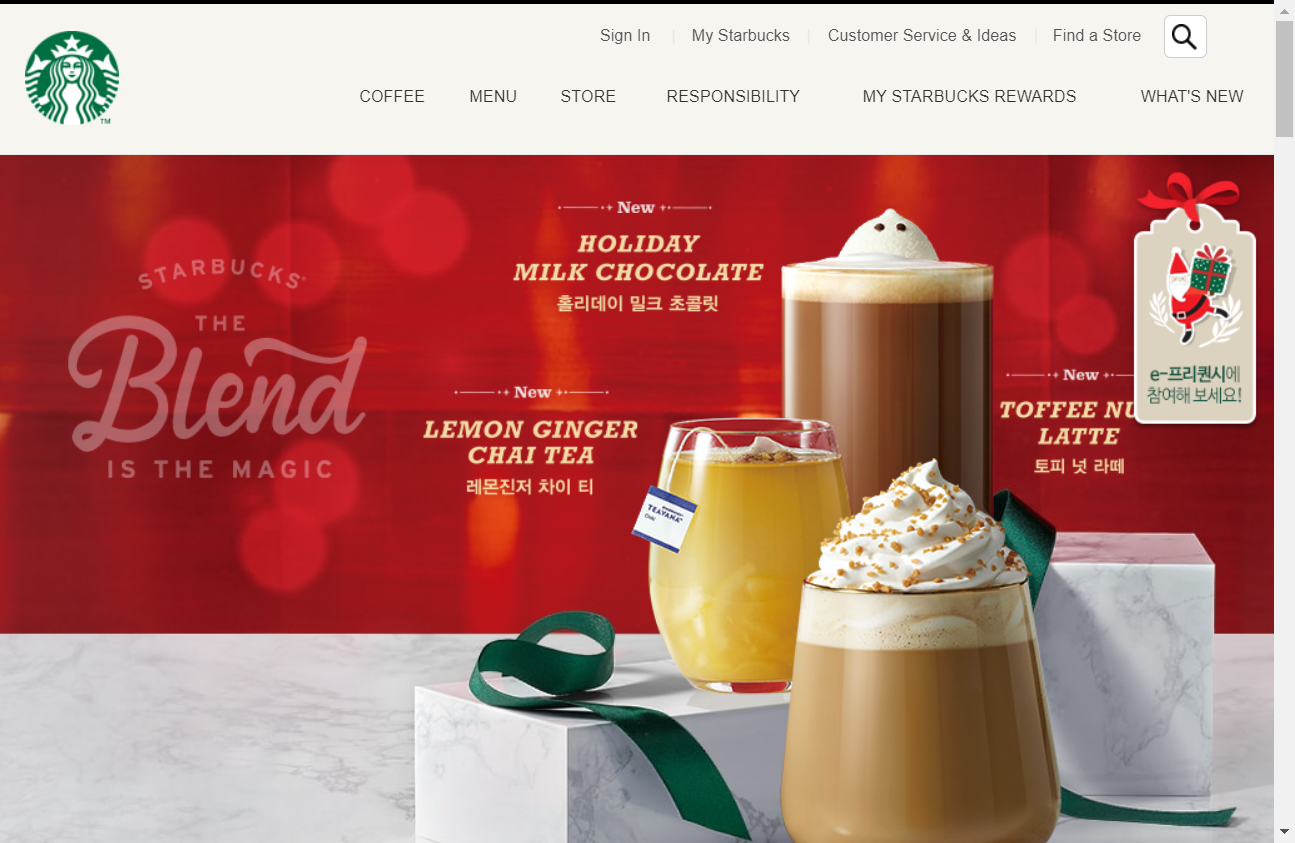

In [11]:
capture_img = './images/seleniumhq_download.png'
driver.save_screenshot(capture_img)
Image(capture_img)

#과제2 : 서울지역 스타벅스 매장정보 크롤링

In [13]:
url_page = 'http://www.istarbucks.co.kr/store/index.do'
driver.get(url_page)

In [14]:
driver.find_element_by_css_selector('#container > section.store_bn1_section > article > div.store_bn1_btn > a').click()

In [15]:
driver.find_element_by_css_selector('#container > div > form > fieldset > div > section > article.find_store_cont > article > header.loca_search > h3 > a').click()

In [16]:
driver.find_element_by_css_selector('#container > div > form > fieldset > div > section > article.find_store_cont > article > article:nth-child(4) > div.loca_step1 > div.loca_step1_cont > ul > li:nth-child(1) > a').click()

In [17]:
driver.find_element_by_css_selector('#mCSB_2_container > ul > li:nth-child(1) > a').click()

In [18]:
current_url = driver.current_url
current_url

'http://www.istarbucks.co.kr/store/store_map.do'

In [169]:
html = driver.page_source
soup = BeautifulSoup(html, "lxml")

In [170]:
tmp = soup.find_all('li', 'quickResultLstCon')
tmp

[<li class="quickResultLstCon" data-code="3263" data-hlytag="null" data-index="0" data-lat="37.567381" data-long="126.977859" data-name="한국프레스센터" data-storecd="1047" style="background:#fff"> <strong>한국프레스센터  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="한국프레스센터" data-store="1047" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong> <p class="result_details">서울특별시 중구 세종대로 124 (태평로1가)<br/><a href="tel:02-722-3263">02-722-3263</a></p> <i class="pin_general">리저브 매장 2번</i></li>,
 <li class="quickResultLstCon" data-code="9237" data-hlytag="null" data-index="1" data-lat="37.56781712" data-long="126.978738" data-name="무교동" data-storecd="179" style="background:#fff"> <strong>무교동  <img alt="" class="setStoreFavBtn mCS_img_loaded" data-my_siren_order_store_yn="N" data-name="무교동" data-store="179" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong> <p class="result_details">서울특별시 중

In [171]:
tmp[20].find('p').get_text()

'서울특별시 강남구 언주로 861 (신사동)02-541-3622'

In [172]:
phone_p.findall(tmp[20].get_text())

['02-541-3622']

In [173]:
tmp[497]

<li class="quickResultLstCon" data-code="9570" data-hlytag="null" data-index="477" data-lat="37.613433" data-long="127.077484" data-name="묵동이마트" data-storecd="363" style="background:#fff"> <strong>묵동이마트  <img alt="" class="setStoreFavBtn" data-my_siren_order_store_yn="N" data-name="묵동이마트" data-store="363" data-yn="N" src="//image.istarbucks.co.kr/common/img/store/icon_fav_off.png"/></strong> <p class="result_details">서울특별시 중랑구 동일로 932, 묵동이마트 B1층 (묵동)<br/><a href="tel:02-758-8370">02-758-8370</a></p> <i class="pin_general">리저브 매장 2번</i></li>

In [174]:
len(tmp)

498

In [175]:
tmp[366].get_text().split()

['적선',
 '서울특별시',
 '종로구',
 '새문안로5길',
 '55,',
 '노스게이트빌딩',
 '1층',
 '(적선동)02-758-8050',
 '리저브',
 '매장',
 '2번']

In [133]:
tmp[21].get_text().split()

['수서역R', '서울특별시', '강남구', '광평로', '281', '(수서동)02-6181-3688', '리저브', '매장', '2번']

In [134]:
#점포명
tmp[389].get_text().split()[0]

'숭례문북창'

In [232]:
#구
tmp[303].get_text().split()[2]

'서울특별시'

In [245]:
tmp[303].get_text().split()[3]

'양천구'

In [228]:
#전화번호
phone_p = re.compile("\d{2,3}[ -\.]?\d{3,4}[ -\.]?\d{4}")
phone_re = phone_p.findall(tmp[303].get_text())
phone_num = phone_re[0]
phone_num

'02-758-8930'

In [177]:
full_add = tmp[366].find('p').get_text()
full_add

'서울특별시 종로구 새문안로5길 55, 노스게이트빌딩 1층 (적선동)02-758-8050'

In [178]:
end = full_add.index(phone_num)
full_add = full_add[:end]
full_add

'서울특별시 종로구 새문안로5길 55, 노스게이트빌딩 1층 (적선동)'

In [231]:
#주소
full_add = tmp[303].find('p').get_text()
end = full_add.index(phone_num)
full_add = full_add[:end]
full_add

'서울특별시 양천구 남부순환로 430 (신월동)'

In [266]:
sbucksName=[]
sbuksGu=[]
sbucksAddr=[]
sbucksTel=[]

for i in range(len(tmp)):
    if i<20:
        pass
    elif i==303:
        #점포명
        s_name = tmp[i].get_text().split()[0]
        sbucksName.append(s_name)
        #구
        s_gu = tmp[i].get_text().split()[3]
        sbuksGu.append(s_gu)
        #전화번호
        phone_p = re.compile("\d{2,3}[ -\.]?\d{3,4}[ -\.]?\d{4}")
        phone_re = phone_p.findall(tmp[i].get_text())
        phone_num = phone_re[0]
        sbucksTel.append(phone_num)
        #주소
        full_add = tmp[i].find('p').get_text()
        end = full_add.index(phone_num)
        full_add = full_add[:end]
        sbucksAddr.append(full_add)
        print(s_gu)
        print(i)
    elif i==312:
        #점포명
        s_name = tmp[i].get_text().split()[0]
        sbucksName.append(s_name)
        #구
        s_gu = tmp[i].get_text().split()[3]
        sbuksGu.append(s_gu)
        #전화번호
        phone_p = re.compile("\d{2,3}[ -\.]?\d{3,4}[ -\.]?\d{4}")
        phone_re = phone_p.findall(tmp[i].get_text())
        phone_num = phone_re[0]
        sbucksTel.append(phone_num)
        #주소
        full_add = tmp[i].find('p').get_text()
        end = full_add.index(phone_num)
        full_add = full_add[:end]
        sbucksAddr.append(full_add)
        print(s_gu)
        print(i)
    else:
        #점포명
        s_name = tmp[i].get_text().split()[0]
        sbucksName.append(s_name)
        #구
        s_gu = tmp[i].get_text().split()[2]
        sbuksGu.append(s_gu)
        #전화번호
        phone_p = re.compile("\d{2,3}[ -\.]?\d{3,4}[ -\.]?\d{4}")
        phone_re = phone_p.findall(tmp[i].get_text())
        phone_num = phone_re[0]
        sbucksTel.append(phone_num)
        #주소
        full_add = tmp[i].find('p').get_text()
        end = full_add.index(phone_num)
        full_add = full_add[:end]
        sbucksAddr.append(full_add)

양천구
303
영등포구
312


In [227]:
#구 특이점 확인용

# sbucksName=[]
# sbuksGu=[]
# sbucksAddr=[]
# sbucksTel=[]

# for i in range(len(tmp)):
#     if i<20:
#         pass
#     else:
#         #구
#         s_gu = tmp[i].get_text().split()[2]
#         sbuksGu.append(s_gu)
#         print(s_gu)
#         print(i)

강남구
20
강남구
21
강남구
22
강남구
23
강남구
24
강남구
25
강남구
26
강남구
27
강남구
28
강남구
29
강남구
30
강남구
31
강남구
32
강남구
33
강남구
34
강남구
35
강남구
36
강남구
37
강남구
38
강남구
39
강남구
40
강남구
41
강남구
42
강남구
43
강남구
44
강남구
45
강남구
46
강남구
47
강남구
48
강남구
49
강남구
50
강남구
51
강남구
52
강남구
53
강남구
54
강남구
55
강남구
56
강남구
57
강남구
58
강남구
59
강남구
60
강남구
61
강남구
62
강남구
63
강남구
64
강남구
65
강남구
66
강남구
67
강남구
68
강남구
69
강남구
70
강남구
71
강남구
72
강남구
73
강남구
74
강남구
75
강남구
76
강남구
77
강남구
78
강남구
79
강남구
80
강남구
81
강남구
82
강남구
83
강남구
84
강남구
85
강남구
86
강남구
87
강남구
88
강남구
89
강남구
90
강북구
91
강북구
92
강북구
93
강북구
94
강북구
95
강서구
96
강서구
97
강서구
98
강서구
99
강서구
100
강서구
101
강서구
102
강서구
103
강서구
104
강서구
105
강서구
106
강서구
107
강서구
108
강서구
109
관악구
110
관악구
111
관악구
112
관악구
113
관악구
114
관악구
115
관악구
116
관악구
117
관악구
118
광진구
119
광진구
120
광진구
121
광진구
122
광진구
123
광진구
124
광진구
125
광진구
126
광진구
127
광진구
128
광진구
129
광진구
130
광진구
131
금천구
132
금천구
133
금천구
134
금천구
135
금천구
136
금천구
137
금천구
138
금천구
139
금천구
140
금천구
141
노원구
142
노원구
143
노원구
144
노원구
145
노원구
146
노원구
147
노원구
148
노원구
149
노원구
150
노원구
151
도봉구
152
동작구
153
동작구
154


In [267]:
len(sbucksAddr)

478

In [268]:
len(sbucksTel)

478

In [269]:
len(sbuksGu)

478

In [253]:
sbuksGu

['강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강남구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강북구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '강서구',
 '관악구',
 '관악구',
 '관악구',
 '관악구',
 '관악구',
 '관악구',
 '관악구',
 '관악구',
 '관악구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '광진구',
 '금천구',
 '금천구',
 '금천구',
 '금천구',
 '금천구',
 '금천구',
 '금천구',
 '금천구',
 '금천구',
 '금천구',
 '노원구',
 '노원구',
 '노원구',


In [270]:
len(sbucksName)

478

In [271]:
starbucks = pd.DataFrame({'스타벅스매장':sbucksName, 
                          '구'          :sbuksGu, 
                          '주소'        :sbucksAddr, 
                          '전화번호'    :sbucksTel, 
                         })
starbucks.head(10)

,스타벅스매장,구,주소,전화번호
0,압구정R,강남구,서울특별시 강남구 언주로 861 (신사동),02-541-3622
1,수서역R,강남구,서울특별시 강남구 광평로 281 (수서동),02-6181-3688
2,양재강남빌딩R,강남구,서울특별시 강남구 남부순환로 2621 (도곡동),02-571-3604
3,선릉동신빌딩R,강남구,서울특별시 강남구 테헤란로 409 (삼성동),02-2051-3562
4,봉은사로선정릉,강남구,서울특별시 강남구 봉은사로 446 (삼성동),02-539-3564
5,강남오거리,강남구,서울특별시 강남구 봉은사로2길 39 (역삼동),02-557-3484
6,스타필드코엑스몰R,강남구,서울특별시 강남구 영동대로 513 (삼성동),02-6002-3467
7,강남구청정문,강남구,서울특별시 강남구 학동로 419 (청담동),02-514-3397
8,도곡공원,강남구,서울특별시 강남구 도곡로 205 (역삼동),02-565-3496
9,강남R,강남구,서울특별시 강남구 강남대로 390 (역삼동),02-561-3478


In [272]:
population = pd.read_csv('data/seoul_population_cctv.csv', sep=',', encoding='euc-kr')
population.head()

,구,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
0,강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,1564.173631
1,양천구,2482,34.671731,176598,469945,466121,3824,57442,0.813712,12.223132,893.971889
2,강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643,823.205365
3,용산구,2096,53.216374,108777,245087,229391,15696,37443,6.404256,15.277432,751.225257
4,서초구,2297,63.371266,173912,441539,437407,4132,54887,0.935818,12.430838,739.701750


#과제3 : 서울인구 정보를 가져온 후 스타벅스지표를 나타낸다. (스벅비율=alpha*100*스타벅스매장수/인구수) 

In [273]:
starbucks['구'].unique()

array(['강남구', '강북구', '강서구', '관악구', '광진구', '금천구', '노원구', '도봉구', '동작구',
       '마포구', '서대문구', '서초구', '성북구', '송파구', '양천구', '영등포구', '은평구', '종로구',
       '중구', '강동구', '구로구', '동대문구', '성동구', '용산구', '중랑구'], dtype=object)

In [274]:
tmpCounts = starbucks['구'].value_counts()
tmpCounts.head()

강남구     71
중구      48
서초구     45
종로구     38
영등포구    33
Name: 구, dtype: int64

In [275]:
tmpCounts.index

Index(['강남구', '중구', '서초구', '종로구', '영등포구', '마포구', '송파구', '서대문구', '용산구', '양천구',
       '강서구', '광진구', '성북구', '금천구', '강동구', '구로구', '노원구', '동대문구', '성동구', '관악구',
       '은평구', '동작구', '중랑구', '강북구', '도봉구'],
      dtype='object')

In [276]:
population.set_index('구', inplace=True)
population.head()

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구,,,,,,,,,,
강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,1564.173631
양천구,2482,34.671731,176598,469945,466121,3824,57442,0.813712,12.223132,893.971889
강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643,823.205365
용산구,2096,53.216374,108777,245087,229391,15696,37443,6.404256,15.277432,751.225257
서초구,2297,63.371266,173912,441539,437407,4132,54887,0.935818,12.430838,739.701750


In [277]:
population = pd.concat([population, tmpCounts], axis=1)
population.head()

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차,구
강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,1564.173631,71
강동구,1010,166.490765,177591,434992,430705,4287,58280,0.985535,13.397948,540.215648,10
강북구,831,125.203252,143172,324276,320576,3700,57741,1.141003,17.806128,599.442102,5
강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643,823.205365,14
관악구,2109,149.290780,261401,521685,503956,17729,71840,3.398411,13.770762,464.999100,9


In [278]:
population.rename(columns = {'구':'스타벅스'}, inplace=True)
population.head()

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차,스타벅스
강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,1564.173631,71
강동구,1010,166.490765,177591,434992,430705,4287,58280,0.985535,13.397948,540.215648,10
강북구,831,125.203252,143172,324276,320576,3700,57741,1.141003,17.806128,599.442102,5
강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643,823.205365,14
관악구,2109,149.290780,261401,521685,503956,17729,71840,3.398411,13.770762,464.999100,9


In [279]:
population['스벅지표'] = population['스타벅스'] / population['인구수'] * 100 * 3000

In [280]:
population

,CCTV수,최근증가율,세대수,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차,스타벅스,스벅지표
강남구,3238,150.619195,228883,549255,544257,4998,66412,0.909960,12.091287,1564.173631,71,38.779802
강동구,1010,166.490765,177591,434992,430705,4287,58280,0.985535,13.397948,540.215648,10,6.896679
강북구,831,125.203252,143172,324276,320576,3700,57741,1.141003,17.806128,599.442102,5,4.625689
강서구,911,134.793814,257558,605068,598416,6652,78814,1.099381,13.025643,823.205365,14,6.941369
관악구,2109,149.290780,261401,521685,503956,17729,71840,3.398411,13.770762,464.999100,9,5.175537
광진구,878,53.228621,161714,369999,355032,14967,45202,4.045146,12.216790,601.905647,13,10.540569
구로구,1884,64.973730,172121,439234,406144,33090,61293,7.533570,13.954521,329.195319,10,6.830072
금천구,1348,100.000000,106774,252359,232760,19599,35299,7.766317,13.987613,4.641657,10,11.887826
노원구,1566,188.929889,217900,551069,546911,4158,76466,0.754533,13.875939,109.788770,10,5.443964
도봉구,825,246.638655,137901,342990,340876,2114,55499,0.616344,16.180938,625.687072,1,0.874661


In [281]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = 'data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

macDat = pd.DataFrame({'gu':population.index, 'counts':population['스벅지표']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_str,
              data=macDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')

In [282]:
map

In [283]:
population.to_csv('data/seoul_population_sbucks-idx.csv', sep=',', encoding='euc-kr')

#find_all('p',{'class': 'result_details'}) 가능! + 한번더 ('a')찾기도 됨